# Introduction to the data

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [47]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409,3050,5359,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854,522,2332,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838,568,2270,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626,931,3695,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098,134,964,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [48]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [49]:
print(recent_grads.shape[0])
print(recent_grads.dropna().shape[0])

recent_grads = recent_grads.dropna()

173
172


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a871c88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ac514e0>]], dtype=object)

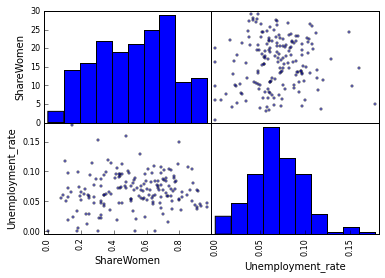

In [50]:
# Scatter plot that Pandas generates
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[["ShareWomen","Unemployment_rate"]])

# Scatter matrix, step 1

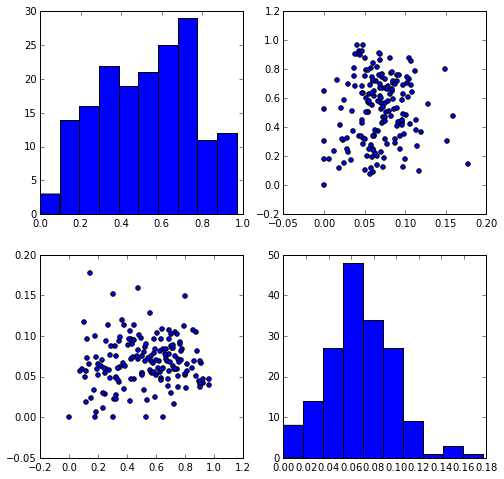

In [51]:
# First, we need to create a Figure instance and create 4 axes, corresponding to each subplot.
fig_rg = plt.figure(figsize=(8,8))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)

# Top left plot
ax1_rg.hist(recent_grads["ShareWomen"])

# Top right plot
ax2_rg.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"])

# Bottom left plot
ax3_rg.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])

# Bottom right plot
ax4_rg.hist(recent_grads["Unemployment_rate"])

plt.show()

# Scatter matrix, steps 2 and 3

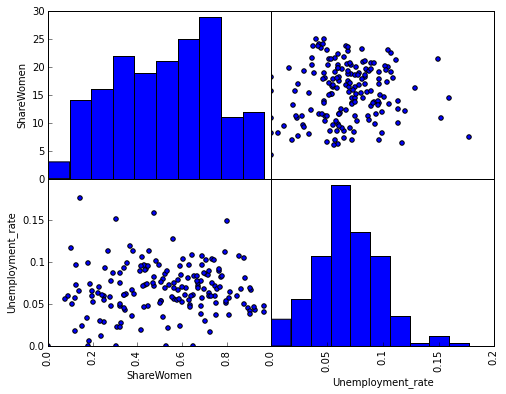

In [52]:
# First, we need to create a Figure instance and create 4 axes, corresponding to each subplot.
fig_rg = plt.figure(figsize=(8,6))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)

# Top left plot
ax1_rg.hist(recent_grads["ShareWomen"])
# Top right plot
ax2_rg.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"])
# Bottom left plot
ax3_rg.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])
# Bottom right plot
ax4_rg.hist(recent_grads["Unemployment_rate"])

# Top left plot
ax1_rg.set_ylabel("ShareWomen")
ax1_rg.get_xaxis().tick_top()
ax1_rg.get_xaxis().set_visible(False)
ax1_rg.get_yaxis().tick_left()
ax1_rg.set_ylim(0,30)
ax1_rg.set_yticklabels([0, 5, 10, 15, 20, 25, 30])

# Top right plot
ax2_rg.get_yaxis().set_visible(False)
ax2_rg.get_xaxis().set_visible(False)
ax2_rg.set_xlim(0.0, 0.20)

# Bottom left plot
ax3_rg.set_xlabel("ShareWomen")
ax3_rg.set_ylabel("Unemployment_rate")
ax3_rg.get_xaxis().tick_bottom()
ax3_rg.get_yaxis().tick_left()
ax3_rg.set_ylim(0.00, 0.20)
ax3_rg.set_yticklabels([0.00, 0.05, 0.10, 0.15])
ax3_rg.set_xlim(0.0, 1.0)
ax3_rg.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)

# Bottom right plot
ax4_rg.set_xlabel("Unemployment_rate")
ax4_rg.get_yaxis().set_visible(False)
ax4_rg.get_xaxis().tick_bottom()
ax4_rg.set_xlim(0.0, 0.20)
ax4_rg.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)

# Remove space between sub plots.
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

# Grouped bar plots, part 1

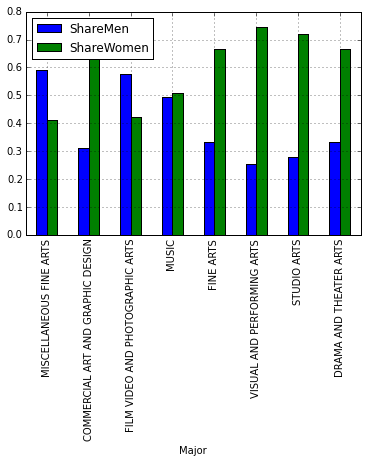

In [56]:
# Pandas generated grouped bar plot
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]
arts = recent_grads[recent_grads["Major_category"] == "Arts"]
arts.set_index("Major", inplace=True)
arts[["ShareMen", "ShareWomen"]].plot(kind="bar")

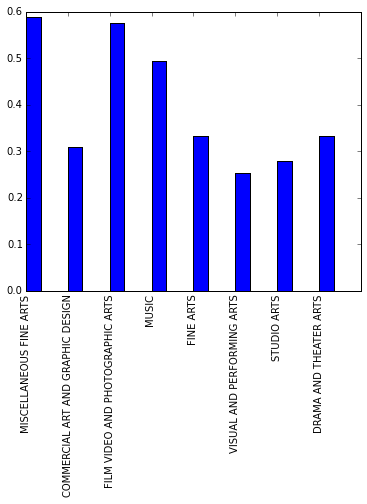

In [103]:
import numpy as np
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]

# Create figure instance and subplot
fig_rg2 = plt.figure(figsize=(6,5))
ax1_rg2 = fig_rg2.add_subplot(1,1,1)

major_names = arts["Major"].tolist()
locs = np.arange(len(major_names))
width = 0.35

men_proportions = arts["ShareMen"].tolist()
bar_1 = ax1_rg2.bar(locs, men_proportions, width)
ax1_rg2.set_xticklabels(major_names, rotation=90)

plt.show()

# Grouped bar plots, part 2

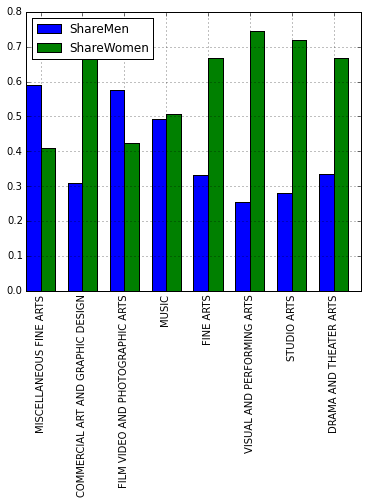

In [126]:
## Part 1

import numpy as np
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]

fig_rg2 = plt.figure(figsize=(6,5))
ax1_rg2 = fig_rg2.add_subplot(1,1,1)

arts = recent_grads[recent_grads["Major_category"] == "Arts"]
major_names = arts["Major"].tolist()
locs = np.arange(len(major_names))
width = 0.35

# List representation of these columns
men_proportions = arts["ShareMen"].tolist()
women_proportions = arts["ShareWomen"].tolist()

# Generate both the bars
bar_1 = ax1_rg2.bar(locs, men_proportions, width)
ax1_rg2.set_xticklabels(major_names, rotation=90)

## Part 2

# Each value offset by `0.35`
offset_locs = locs + width

# Set of bars for `ShareWomen`
bar_2 = ax1_rg2.bar(offset_locs, women_proportions, width, color="green")

# Align x labels with bars better
ax1_rg2.set_xticks(offset_locs)

# Create a legend
plt.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left")

# Display the background grid
plt.grid()
plt.show()